In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
import itertools
from datetime import datetime
from collections import Counter

In [12]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [7]:
df = pd.read_csv ('data_titanic_proyecto.csv')
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [8]:
df.columns.values.tolist()

['PassengerId',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'passenger_class',
 'passenger_sex',
 'passenger_survived']

In [38]:
len(df)

891

In [28]:
piv_C = Counter(df['SibSp'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
piv_C

Mean:  127.28571428571429
Std:  207.4923160613178


Counter({1: 209, 0: 608, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7})

In [32]:
pd.crosstab(np.array(df['SibSp']), np.array(df['passenger_survived']), rownames = ['SibSp'], colnames = ['passenger_survived'])

passenger_survived,N,Y
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Por lo anterior la variable 'SibSp' puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [33]:
piv_C = Counter(df['Parch'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
piv_C

Mean:  127.28571428571429
Std:  228.8678435165551


Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

In [35]:
pd.crosstab(np.array(df['Parch']), np.array(df['passenger_survived']), rownames = ['Parch'], colnames = ['passenger_survived'])

passenger_survived,N,Y
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Por lo anterior la variable 'Parch' puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [ ]:
df = df['Age','SibSp','Fare','Cabin',] 

In [37]:
piv_C = Counter(df['Ticket'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
len(piv_C)

Mean:  1.3083700440528634
Std:  0.7920699945606182


681

In [39]:
len(piv_C) / len(df)

0.7643097643097643

Por lo anterior la variable 'Ticket' como se esperaba no puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [42]:
piv_C = Counter(df['Fare'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  3.592741935483871
Std:  5.837126355895769
Valores distintoos 248


Counter({7.25: 13,
         71.2833: 1,
         7.925: 18,
         53.1: 5,
         8.05: 43,
         8.4583: 1,
         51.8625: 2,
         21.075: 4,
         11.1333: 3,
         30.0708: 2,
         16.7: 2,
         26.55: 15,
         31.275: 7,
         7.8542: 13,
         16.0: 1,
         29.125: 5,
         13.0: 42,
         18.0: 3,
         7.225: 12,
         26.0: 31,
         8.0292: 1,
         35.5: 4,
         31.3875: 4,
         263.0: 4,
         7.8792: 4,
         7.8958: 38,
         27.7208: 5,
         146.5208: 2,
         7.75: 34,
         10.5: 24,
         82.1708: 2,
         52.0: 7,
         7.2292: 15,
         11.2417: 2,
         9.475: 1,
         21.0: 6,
         41.5792: 3,
         15.5: 8,
         21.6792: 1,
         17.8: 2,
         39.6875: 6,
         7.8: 1,
         76.7292: 3,
         61.9792: 1,
         27.75: 4,
         46.9: 6,
         80.0: 2,
         83.475: 2,
         27.9: 6,
         15.2458: 5,
         8.1583: 

Por lo anterior la variable 'Fare' no la omitimos aunque no se espera aporte mucho y en futuros análisis se obtendrá la respuesta de cuanto aporte.

In [43]:
piv_C = Counter(df['Cabin'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  6.02027027027027
Std:  56.170044627367595
Valores distintoos 148


Counter({nan: 687,
         'C85': 1,
         'C123': 2,
         'E46': 1,
         'G6': 4,
         'C103': 1,
         'D56': 1,
         'A6': 1,
         'C23 C25 C27': 4,
         'B78': 1,
         'D33': 2,
         'B30': 1,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F33': 3,
         'F G73': 2,
         'E31': 1,
         'A5': 1,
         'D10 D12': 1,
         'D26': 2,
         'C110': 1,
         'B58 B60': 2,
         'E101': 3,
         'F E69': 1,
         'D47': 1,
         'B86': 1,
         'F2': 3,
         'C2': 2,
         'E33': 2,
         'B19': 1,
         'A7': 1,
         'C49': 1,
         'F4': 2,
         'A32': 1,
         'B4': 1,
         'B80': 1,
         'A31': 1,
         'D36': 2,
         'D15': 1,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'C87': 1,
         'B77': 2,
         'E67': 2,
         'B94': 1,
         'C125': 2,
         'C99': 1,
         'C118': 1,
         'D7': 1,
         'A19'

Por la alta presencia de valores "nan" y considerando que los demás valores no aportarían a la clasificación la variable 'Cabin' es omitida.

In [45]:
piv_C = Counter(df['Embarked'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  222.75
Std:  250.21128571669183
Valores distintoos 4


Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [46]:
pd.crosstab(np.array(df['Embarked']), np.array(df['passenger_survived']), rownames = ['Embarked'], colnames = ['passenger_survived'])

passenger_survived,N,Y
Embarked,,
C,75,93
Q,47,30
S,427,217


De lo anterior se considera que la variable 'Embarked' puede aportar al modelo a generar.

In [47]:
piv_C = Counter(df['passenger_class'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  297.0
Std:  137.79937106774713
Valores distintoos 3


Counter({'Lower': 491, 'Upper': 216, 'Middle': 184})

In [49]:
pd.crosstab(np.array(df['passenger_class']), np.array(df['passenger_survived']), rownames = ['passenger_class'], colnames = ['passenger_survived'])

passenger_survived,N,Y
passenger_class,,
Lower,372,119
Middle,97,87
Upper,80,136


De lo anterior se considera que la variable 'passenger_class' puede aportar valor

In [50]:
piv_C = Counter(df['passenger_sex'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  445.5
Std:  131.5
Valores distintoos 2


Counter({'M': 577, 'F': 314})

In [51]:
pd.crosstab(np.array(df['passenger_sex']), np.array(df['passenger_survived']), rownames = ['passenger_sex'], colnames = ['passenger_survived'])

passenger_survived,N,Y
passenger_sex,,
F,81,233
M,468,109


Por lo que l variable 'passenger_sex' puede ser un alto indicador de sobrevivencia.

In [57]:
dataset = df[['SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex','passenger_survived']]

In [58]:
dataset.head()

,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,0,7.2500,S,Lower,M,N
1,1,0,71.2833,C,Upper,F,Y
2,0,0,7.9250,S,Lower,F,Y
3,1,0,53.1000,S,Upper,F,Y
4,0,0,8.0500,S,Lower,M,N


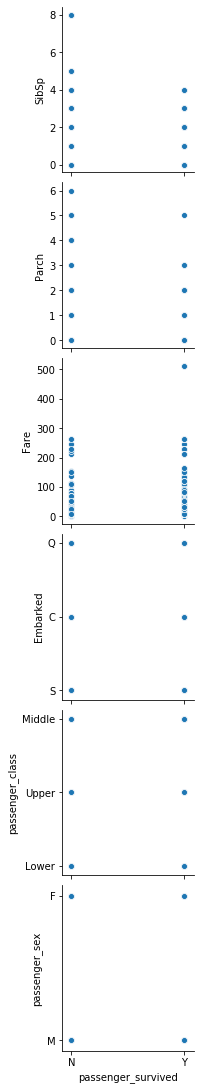

In [60]:
pp = sns.pairplot(data=dataset,
                  x_vars=['passenger_survived'],
                  y_vars=['SibSp', 'Parch',
                          'Fare','Embarked','passenger_class',
                         'passenger_sex'])